In [290]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct
from tqdm import tqdm

%matplotlib inline

df = pd.read_csv('datasets/avy_X-y.csv', index_col='Unnamed: 0')

In [291]:
print(df.columns)
print(len(df))
df.count()

Index(['Temperature_m', 'Relative_Humidity_m', 'Temperature_tl',
       'Relative_Humidity_tl', 'Wind_Speed_Average_tl',
       'Wind_Speed_Maximum_tl', 'Wind_Direction_(deg.)_tl', 'precip', 'depth',
       'pressure', 'above', 'below', 'near', 'storm_slabs', 'wet_slabs',
       'persistent', 'wind_slab', 'loose_wet', 'glide', 'cornices',
       'loose_dry'],
      dtype='object')
28084


Temperature_m               28084
Relative_Humidity_m         28084
Temperature_tl              28084
Relative_Humidity_tl        28084
Wind_Speed_Average_tl       28084
Wind_Speed_Maximum_tl       28084
Wind_Direction_(deg.)_tl    28084
precip                      28084
depth                       28084
pressure                    28084
above                        9910
below                        9910
near                         9910
storm_slabs                  9910
wet_slabs                    9910
persistent                   9910
wind_slab                    9910
loose_wet                    9910
glide                        9910
cornices                     9910
loose_dry                    9910
dtype: int64

In [292]:
df.describe()

,Temperature_m,Relative_Humidity_m,Temperature_tl,Relative_Humidity_tl,Wind_Speed_Average_tl,Wind_Speed_Maximum_tl,Wind_Direction_(deg.)_tl,precip,depth,pressure,...,below,near,storm_slabs,wet_slabs,persistent,wind_slab,loose_wet,glide,cornices,loose_dry
count,28084.000000,28084.000000,28084.000000,28084.000000,28084.000000,28084.000000,28084.000000,28084.000000,28084.000000,28084.000000,...,9910.000000,9910.000000,9910.000000,9910.000000,9910.000000,9910.000000,9910.000000,9910.000000,9910.000000,9910.000000
mean,41.339892,69.057256,40.457058,71.833346,5.993869,13.218412,232.492375,0.010882,35.258536,1016.170093,...,1.932492,2.335116,0.456206,0.031483,0.053280,0.803229,0.519677,0.009687,0.160747,0.036428
std,14.189910,24.539394,14.509618,28.395706,4.859696,8.174939,106.053639,0.034144,42.258102,6.079356,...,0.753626,0.762826,0.498104,0.174629,0.224602,0.397578,0.499638,0.097951,0.367316,0.187362
min,3.229000,4.673000,5.743000,4.038000,-0.036000,0.000000,0.005000,0.000000,0.000000,990.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.880000,48.310000,29.200000,46.875000,1.492750,7.160000,106.300000,0.000000,2.905000,1013.212000,...,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,39.380000,76.045000,37.900000,82.500000,5.577500,12.960000,286.700000,0.000000,11.260000,1017.278000,...,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,50.840000,91.900000,51.105000,99.400000,9.330000,18.380000,310.500000,0.000000,69.307500,1020.165250,...,2.000000,3.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,86.800000,100.000000,85.000000,100.000000,41.900000,72.800000,360.000000,0.740000,143.700000,1034.949000,...,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Prediction 1:
# Storm Slab

### Storm slab is formed during storms and tends to stabilize very quickly (~3 days after snowfall typical; definitely should resolve within a week)

y = NWAC's forecast of storm slab: 0 or 1 at time T
X = weather conditions, 5 days prior to T 
_possible revision to model: 5 days before and up to 24 hours after (because NWAC may predict storm slab as a hazard when a storm is coming in in the afternoon) - see if this is relevant_

In [293]:
y_all = df.storm_slabs   # np.npdarray 

In [294]:
# some relevant methods for manipluating y

print(y_all.values.shape)
print(y_all.count())
print(y_all.unique())
print(y_all.iloc[:5].isna())
print('...')
print(y_all.iloc[-5:].isna())
print()
y_ok = y_all[~y_all.isna()]
print('y_ok.__len__() =', len(y_ok))

(28084,)
9910
[ nan   1.   0.]
2014-09-23 09:00:00    True
2014-09-23 10:00:00    True
2014-09-23 11:00:00    True
2014-09-23 12:00:00    True
2014-09-23 13:00:00    True
Name: storm_slabs, dtype: bool
...
2017-12-07 20:00:00    False
2017-12-07 21:00:00    False
2017-12-07 22:00:00    False
2017-12-07 23:00:00    False
2017-12-08 00:00:00    False
Name: storm_slabs, dtype: bool

y_ok.__len__() = 9910


In [295]:
df.precip = df.precip.apply(lambda x: x*100)

In [449]:
cols = ['Temperature_m', 'Wind_Speed_Average_tl', 'precip'] 
# cols to use

data = df[cols]
       
# DNU   'depth', 'Temperature_tl', 'Wind_Speed_Maximum_tl',
       #'above', 'below', 'near', 'storm_slabs', 'wet_slabs', 'Relative_Humidity_m',
       #'persistent', 'wind_slab', 'loose_wet', 'glide', 'cornices',
       #'loose_dry', 'Relative_Humidity_tl',  'Wind_Direction_(deg.)_tl',]

In [450]:
data.corr()
# wind_speed average and maximum are 94% correlated so drop maximum.
# temperature tl and m are also eqivalent

,Temperature_m,Wind_Speed_Average_tl,precip
Temperature_m,1.000000,-0.223290,-0.174594
Wind_Speed_Average_tl,-0.223290,1.000000,0.251893
precip,-0.174594,0.251893,1.000000


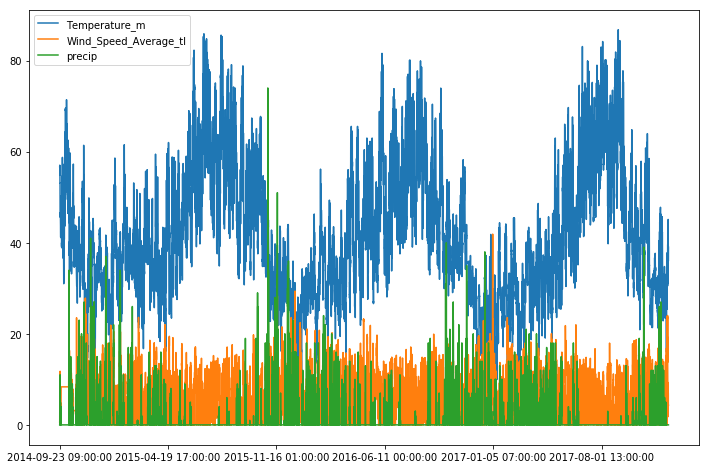

In [451]:
data.plot(figsize=(12, 8))

In [452]:
print(data.values.shape)
print()
print(data.count())
# ok so: y is 9910 samples; these samples correspond to timestamps from a subset of the data
print()
print(len(data[~y_all.isna()]), '= number of data corresponding to y_ok')
print()
print(data.loc[y_ok.index[0]])

(28084, 3)

Temperature_m            28084
Wind_Speed_Average_tl    28084
precip                   28084
dtype: int64

9910 = number of data corresponding to y_ok

Temperature_m            29.510
Wind_Speed_Average_tl     2.554
precip                    0.000
Name: 2014-12-20 00:00:00, dtype: float64


In [453]:
# find i | x[i] matches index of y[j]
# only have to run it once!

dicty = {}    # map from .iloc index of y: corresponding .iloc index of data

lower_limit = 0
for i in range(len(y_ok)):
    for j in range(lower_limit, len(data)):
        if data.index[j] == y_ok.index[i]:
            dicty[i] = j
            lower_limit = j
            break

In [454]:
dicty[0]

2103

In [455]:
data.values.shape

(28084, 3)

In [456]:
fl = 18  # fl = forward looking - ie. how far forward
days = 3

X_multiseries = np.empty((len(y_ok) - fl, 24*days, len(data.columns)))   
# 9910 - 30 samples because last day goes into future; days of weather info * 24hours/day  x  columns

for i in range(len(y_ok) - fl):
    X_multiseries[i] = data.values[dicty[i] - 24*(days) + fl: dicty[i] + fl]
    
# X is now a dataset with 'days' days worth of weather for each y

y = y_ok[:-fl]
X_multiseries.shape

y.shape

(9892,)

In [457]:
# look at some X s

def view_x(i, X=X_multiseries, labels=y.values):
    # view i-th sample of multiseries data
    print(' \n\n#####')
    x = X[i]
    for s in range(x.shape[-1]):  # for series index:
        plt.plot(range(len(x[:, s])), x[:, s], label=cols[s])
    plt.legend(loc=2)
    plt.show()
    print(labels[i])

 

#####


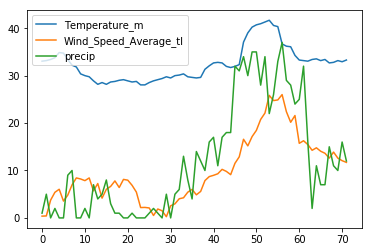

1.0
 

#####


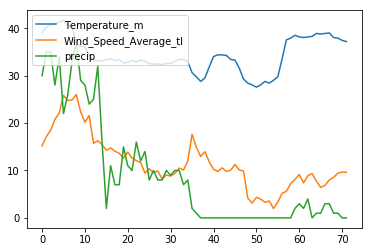

0.0


In [458]:
view_x(24)  # danger of storm slab

view_x(72)  # no danger

One idea:

# Replace X with DCT transform of X

### dimensionality reduction by eliminating HF noise

For dataset, use DCT of time series points; this is the same information but easy to compress by deleting HF components. Most of the info is stored in the 0th component (mean) and the 1st component (trend left-right).




In [459]:
# build DCT of time series

X_transform = X_multiseries.copy()   # copy old dataset; transform will be same shape.

for time_series in tqdm(range(X_multiseries.shape[-1])):
    X_transform[:, :, time_series] = dct(X_multiseries[:, :, time_series])
    
# remove HF data... keep ? transform components
transform_components = 7

print(X_transform.shape)
X_transform = X_transform[:, :transform_components, :]  # ?
print(X_transform.shape)

100%|██████████| 3/3 [00:00<00:00, 77.34it/s]

(9892, 72, 3)
(9892, 7, 3)


In [460]:
# test - rebuild some samples with DCT III to confirm that this is real

# X_transformed_back = np.zeros(X_multiseries.shape)  # copy shape of old dataset; transform will be same shape.
# OR
X_transformed_back = np.zeros(X_transform.shape)  # copy shape of transform; remap times to this scale

X_transformed_back[:, :transform_components, :] = X_transform

for time_series in tqdm(range(X_multiseries.shape[-1])):
    X_transformed_back[:, :, time_series] = dct(X_transformed_back[:, :, time_series], type=3)

100%|██████████| 3/3 [00:00<00:00, 264.00it/s]


[[  4.80624000e+03   1.71242400e+03   1.72400000e+03]
 [  1.38738990e+02   3.07849551e+02   9.83357827e+02]
 [ -2.25178965e+01  -2.21671110e+02  -6.66557359e+01]
 [ -1.27582055e+02  -1.70637503e+02  -3.16000896e+02]
 [ -1.15413927e+02  -3.30376984e+02  -2.90882969e+02]
 [ -1.54287695e+02  -9.76572927e+01  -3.37836360e+02]
 [ -2.25038161e-01   7.34060587e+01  -1.05613456e+02]]
 

#####


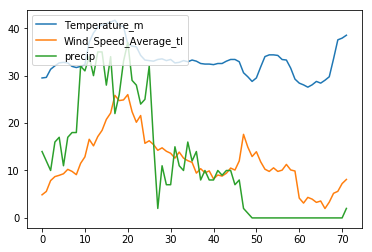

1.0
 

#####


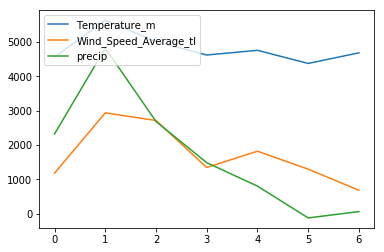

1.0


In [461]:
# looks good although scales are weird...:
print(X_transform[60])   # 4 series; transform_components transform coefs per series
view_x(60)
view_x(60, X=X_transformed_back)

# Train a model

### Using either the transform coefs themselves,
### or the re-scaled X_transformed_back

In [462]:
from sklearn.ensemble import RandomForestRegressor as RF

# make RF for each time series
X_transform[:, :, ]
multi_rf = {}
for i in range(len(data.columns)):
    multi_rf[i] = RF(n_estimators=3, n_jobs=-1, max_features=3, max_depth=3)

In [463]:
# train/test split

split = -2000
X_train = X_transformed_back[:split]
X_test = X_transformed_back[split:]

y_train = y[:split].values   # y is a DataFrame
y_test = y[split:].values

y_train.shape

(7892,)

In [464]:
# fit each RF to a series (X predict y_train: 0.0...1.0)
for s in tqdm(range(X_train.shape[-1])):
    multi_rf[s].fit(X_train[:, :, s], y_train)

100%|██████████| 3/3 [00:00<00:00,  9.09it/s]


In [465]:
# generate features for training set to train metaclassifier
X_train_meta = np.empty((X_train.shape[0], X_train.shape[-1]))
for i in tqdm(range(X_train.shape[-1])):
    X_train_meta[:, i] = multi_rf[i].predict(X_train[:, :, i])

100%|██████████| 3/3 [00:00<00:00,  9.68it/s]


 

#####


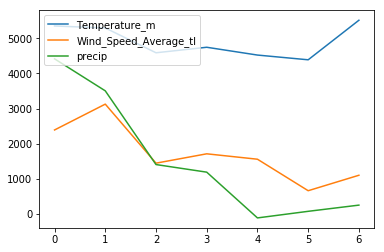

1.0
 

#####


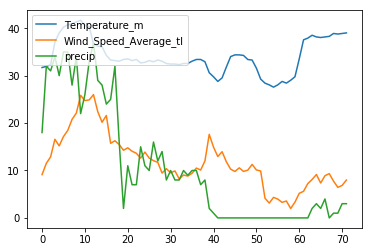

1.0
[ 0.39214008  0.68934626  0.65122727]
 

#####


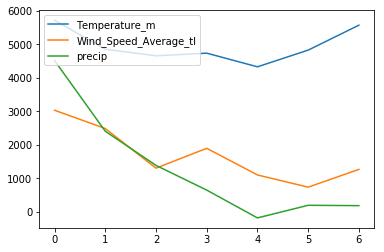

0.0
 

#####


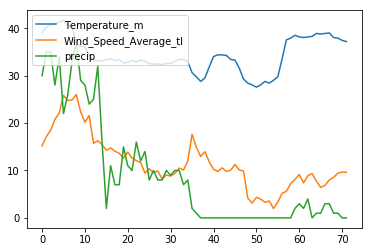

0.0
[ 0.39214008  0.68934626  0.65122727]
 

#####


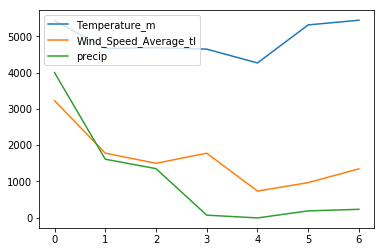

0.0
 

#####


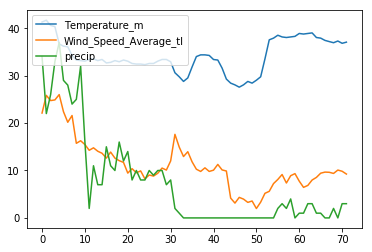

0.0
[ 0.30359457  0.68934626  0.42909815]
 

#####


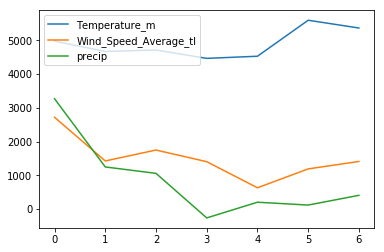

0.0
 

#####


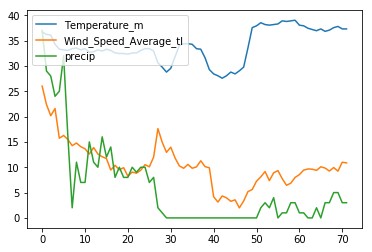

0.0
[ 0.46547506  0.58976052  0.69320275]
 

#####


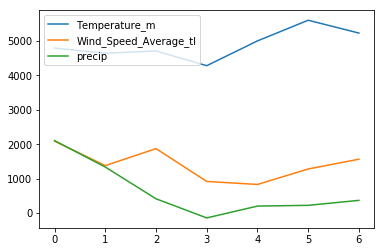

0.0
 

#####


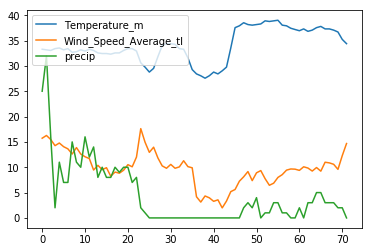

0.0
[ 0.46547506  0.64877659  0.69320275]


In [476]:
for t in range(5):
    time = 68 + t * 4
    view_x(time, X_train)
    view_x(time)
    print(X_train_meta[time])

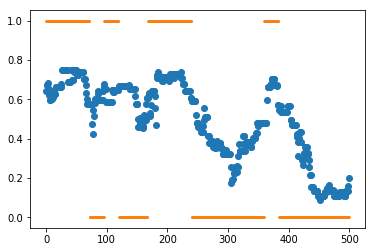

In [467]:
plt.scatter(range(500), X_train_meta[:500].mean(axis=1))
plt.scatter(range(500), y_train[:500], alpha=1, s=3)
# n_estimators = 3

In [468]:
X_test_meta = np.empty((X_test.shape[0], X_test.shape[-1]))
for i in tqdm(range(X_test.shape[-1])):
    X_test_meta[:, i] = multi_rf[i].predict(X_test[:, :, i])

X_test_meta.shape

100%|██████████| 3/3 [00:00<00:00,  9.67it/s]


(2000, 3)

In [469]:
zp = (zip(cols, X_test_meta.mean(axis=0)))
for item in zp:
    print(item)
y_test.mean()

('Temperature_m', 0.54291116868152933)
('Wind_Speed_Average_tl', 0.53137075031565084)
('precip', 0.57123490817406564)


0.35899999999999999

In [470]:
cols
y_test_pred = X_test_meta.mean(axis=1)

correct = 0
for i in range(len(y_test)):
    if y_test[i] != np.round(y_test_pred[i]):
        # print(i, y_test.values[i], y_test_pred[i])
        pass
    else:
        correct += 1
        
print(correct, 'of', len(y_test))

1036 of 2000


 

#####


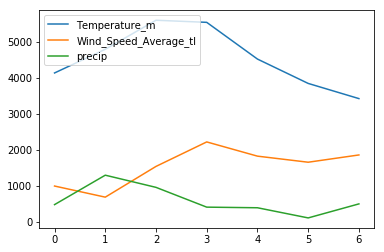

1.0
0.667177963512
[ 0.65955454  0.64877659  0.69320275]
 

#####


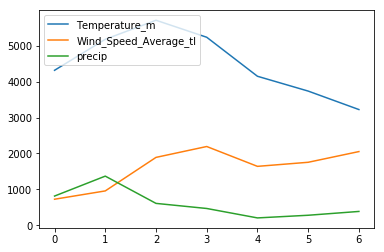

1.0
0.667245404536
[ 0.65975687  0.64877659  0.69320275]
 

#####


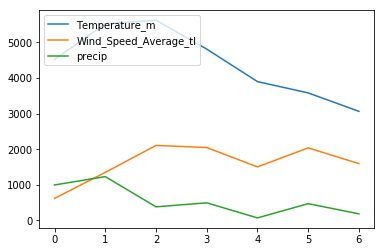

1.0
0.672358349193
[ 0.65975687  0.64877659  0.70854159]
 

#####


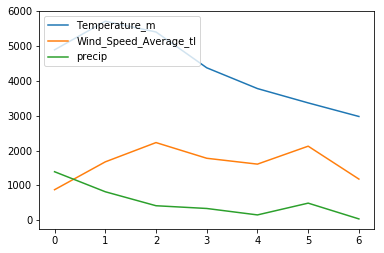

1.0
0.667245404536
[ 0.65975687  0.64877659  0.69320275]
 

#####


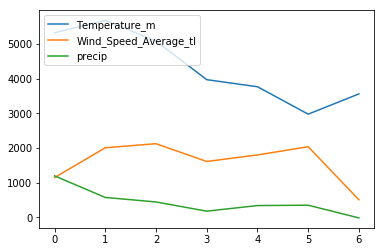

1.0
0.680768626487
[ 0.65975687  0.68934626  0.69320275]
 

#####


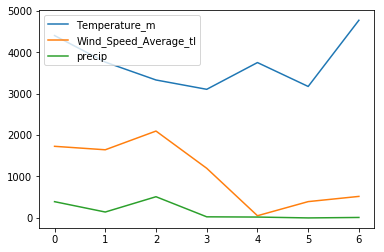

1.0
0.46179483874
[ 0.65975687  0.41036598  0.31526167]
 

#####


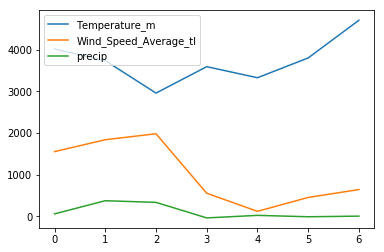

1.0
0.427976517914
[ 0.65975687  0.30891102  0.31526167]
 

#####


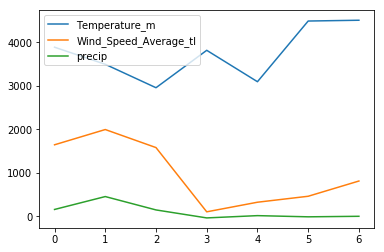

1.0
0.406485789647
[ 0.59528468  0.30891102  0.31526167]
 

#####


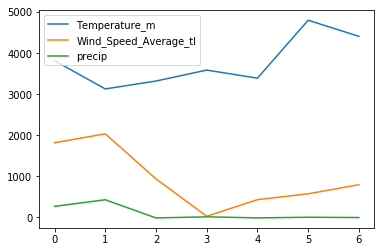

1.0
0.381650172334
[ 0.65975687  0.24299774  0.24219591]
 

#####


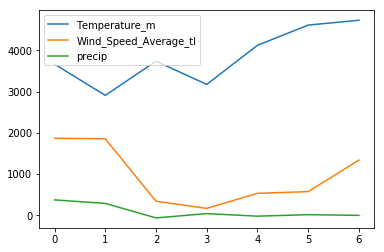

1.0
0.46807064166
[ 0.65975687  0.31535691  0.42909815]
 

#####


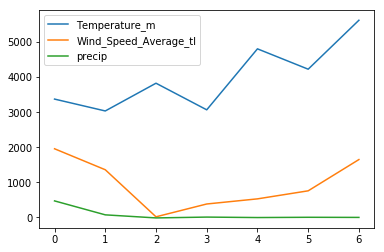

1.0
0.34284258583
[ 0.2190019   0.56732994  0.24219591]
 

#####


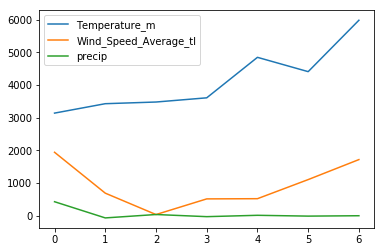

1.0
0.281476054264
[ 0.2190019   0.4946903   0.13073596]
 

#####


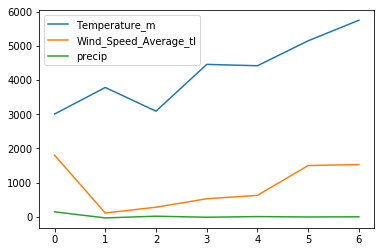

1.0
0.279468755854
[ 0.30488593  0.40278438  0.13073596]
 

#####


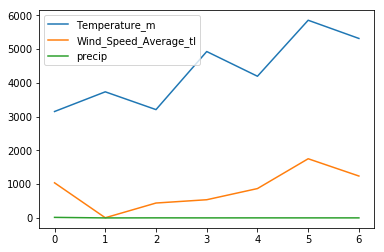

1.0
0.286179649149
[ 0.27293013  0.52793861  0.0576702 ]
 

#####


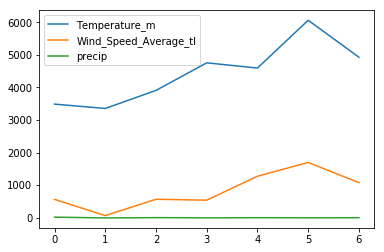

1.0
0.348908720317
[ 0.46111734  0.52793861  0.0576702 ]
 

#####


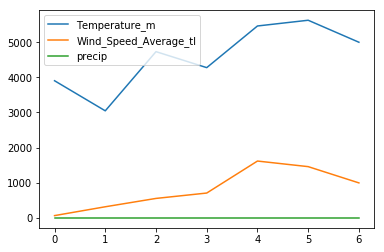

1.0
0.384005646354
[ 0.56640812  0.52793861  0.0576702 ]
 

#####


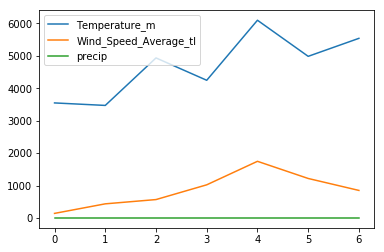

1.0
0.30848289917
[ 0.2190019   0.64877659  0.0576702 ]
 

#####


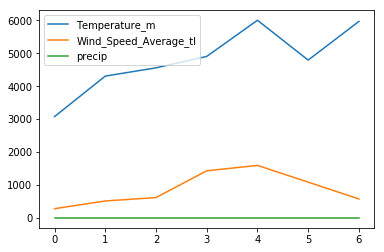

1.0
0.30848289917
[ 0.2190019   0.64877659  0.0576702 ]
 

#####


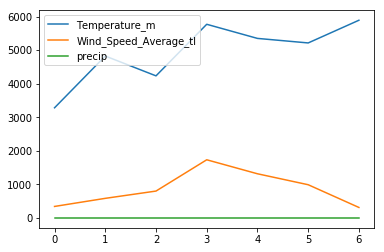

0.0
0.260479772013
[ 0.07499252  0.64877659  0.0576702 ]
 

#####


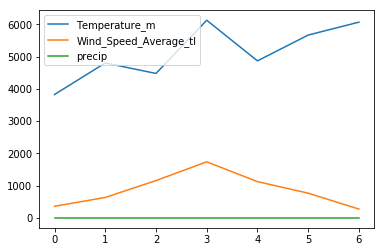

0.0
0.260479772013
[ 0.07499252  0.64877659  0.0576702 ]
 

#####


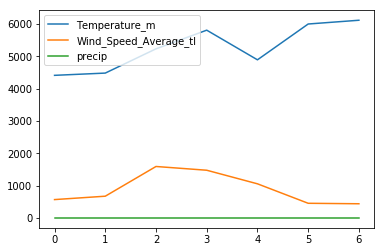

0.0
0.211064472466
[ 0.07499252  0.5005307   0.0576702 ]
 

#####


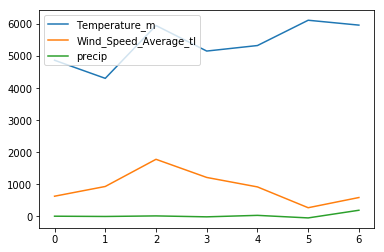

0.0
0.287237660881
[ 0.23044633  0.5005307   0.13073596]
 

#####


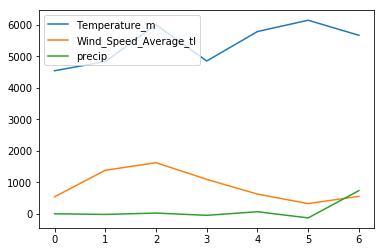

0.0
0.37383707735
[ 0.23044633  0.44355616  0.44750874]
 

#####


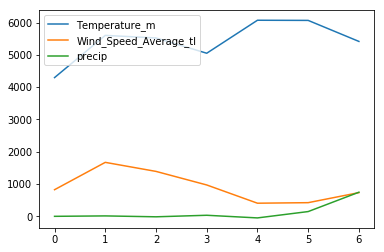

0.0
0.331210131476
[ 0.19830379  0.44355616  0.35177044]
 

#####


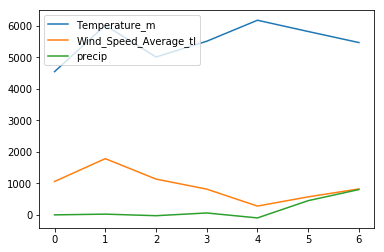

1.0
0.291053666913
[ 0.17064469  0.35122723  0.35128908]
 

#####


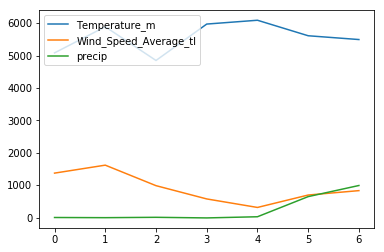

1.0
0.258934890852
[ 0.17064469  0.47542402  0.13073596]
 

#####


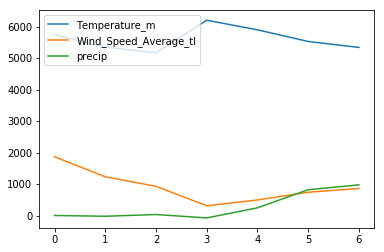

1.0
0.545311453258
[ 0.37184309  0.47542402  0.78866725]
 

#####


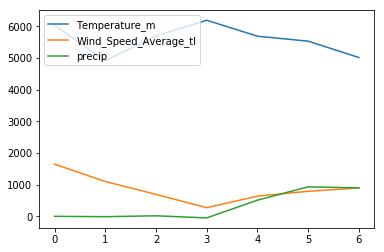

1.0
0.562816318115
[ 0.37184309  0.52793861  0.78866725]
 

#####


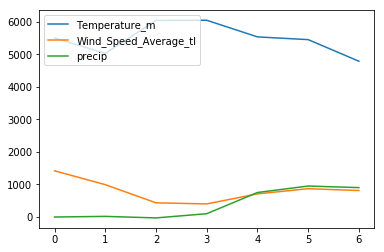

1.0
0.578631028179
[ 0.37184309  0.52793861  0.83611138]
 

#####


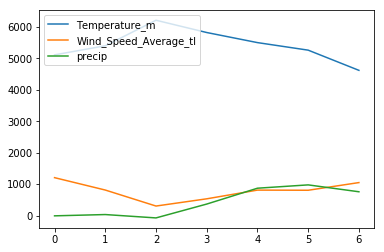

1.0
0.609747276264
[ 0.46519183  0.52793861  0.83611138]


In [471]:
for t in range(30):
    time = t * 4
    view_x(time, X_test)  # no danger
    print(X_test_meta[time].mean())
    print(X_test_meta[time])

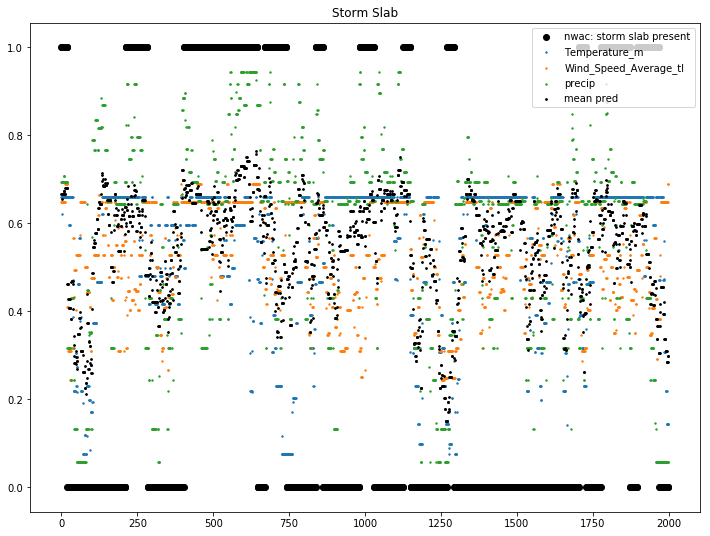

In [472]:
plt.figure(figsize=(12, 9))

plt.scatter(range(len(y_test)), y_test, c='k', label='nwac: storm slab present')

for s in range(X_test_meta.shape[-1]):
    plt.scatter(range(len(X_test_meta)), X_test_meta[:, s], s=2, label=cols[s])
# not very helpful, therefore:
    
plt.scatter(range(len(X_test_meta)), X_test_meta.mean(axis=1), s=3, c='k', label='mean pred')

plt.title('Storm Slab')
plt.legend(loc=1)
    
plt.show()
# n_estimators = 5

In [473]:
print('Mean Sq. Errors \n')
mse = {}
for s in range(len(cols)):
    mse[cols[s]] = sum((X_test_meta[:, s] - y_test) ** 2) / len(y_test)
    print(cols[s], ' - ', mse[cols[s]])


Mean Sq. Errors 

Temperature_m  -  0.276039112385
Wind_Speed_Average_tl  -  0.264200155439
precip  -  0.270692745309


In [474]:
for s in range(len(cols)):
    print(cols[s])
    print('train:', multi_rf[s].score(X_train[:, :, s], y_train))
    print('test:', multi_rf[s].score(X_test[:, :, s], y_test))

Temperature_m
train: 0.238673466761
test: -0.19954941741
Wind_Speed_Average_tl
train: 0.136205639982
test: -0.148102309843
precip
train: 0.385609074005
test: -0.176316363745
